In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [3]:
df = pd.read_csv('weather_forecast_data.csv')

In [4]:
df

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1       27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2       25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3       23.622080  74.367758    7.050551    67.255282   982.632013     rain
4       20.591370  96.858822    4.643921    47.676444   980.825142  no rain
...           ...        ...         ...          ...          ...      ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain

[2500 rows x 6 columns]

In [6]:
df.head()

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
0    23.720338  89.592641    7.335604    50.501694  1032.378759     rain
1    27.879734  46.489704    5.952484     4.990053   992.614190  no rain
2    25.069084  83.072843    1.371992    14.855784  1007.231620  no rain
3    23.622080  74.367758    7.050551    67.255282   982.632013     rain
4    20.591370  96.858822    4.643921    47.676444   980.825142  no rain

In [7]:
df.tail()

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
2495    21.791602  45.270902   11.807192    55.044682  1017.686181  no rain
2496    27.558479  46.481744   10.884915    39.715133  1008.590961  no rain
2497    28.108274  43.817178    2.897128    75.842952   999.119187  no rain
2498    14.789275  57.908105    2.374717     2.378743  1046.501875  no rain
2499    26.554356  97.101517   18.563084    81.357508  1001.729176  no rain

In [8]:
df.Rain.value_counts()

Rain
no rain    2186
rain        314
Name: count, dtype: int64

In [11]:
label = LabelEncoder()

In [13]:
scaler = StandardScaler()

In [15]:
df.Rain = label.fit_transform(df.Rain)

In [16]:
df

Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure  Rain
0       23.720338  89.592641    7.335604    50.501694  1032.378759     1
1       27.879734  46.489704    5.952484     4.990053   992.614190     0
2       25.069084  83.072843    1.371992    14.855784  1007.231620     0
3       23.622080  74.367758    7.050551    67.255282   982.632013     1
4       20.591370  96.858822    4.643921    47.676444   980.825142     0
...           ...        ...         ...          ...          ...   ...
2495    21.791602  45.270902   11.807192    55.044682  1017.686181     0
2496    27.558479  46.481744   10.884915    39.715133  1008.590961     0
2497    28.108274  43.817178    2.897128    75.842952   999.119187     0
2498    14.789275  57.908105    2.374717     2.378743  1046.501875     0
2499    26.554356  97.101517   18.563084    81.357508  1001.729176     0

[2500 rows x 6 columns]

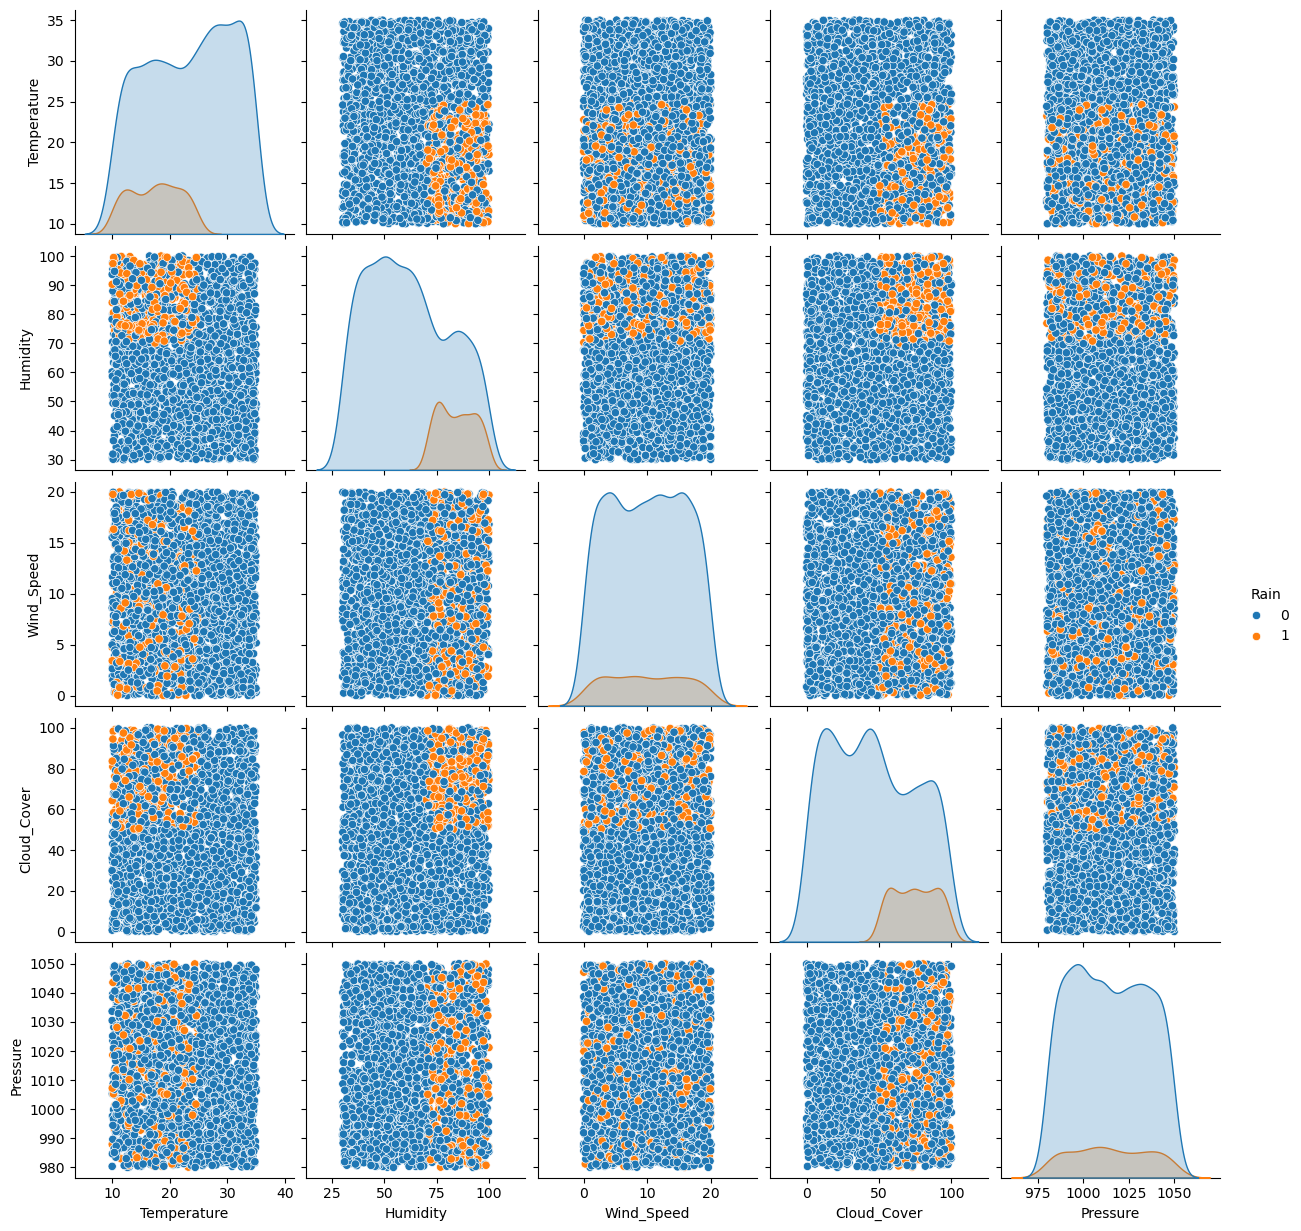

In [21]:
sb.pairplot(df,hue='Rain')

In [22]:
corr = df.corr()

<Axes: >

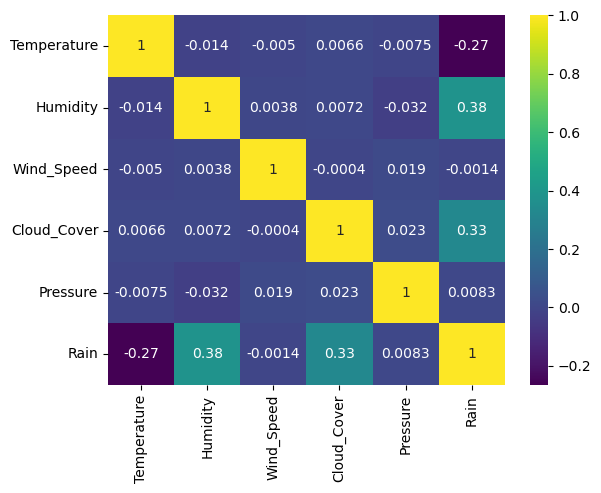

In [24]:
sb.heatmap(corr,annot=True,cmap='viridis')

<Axes: xlabel='Temperature', ylabel='Count'>

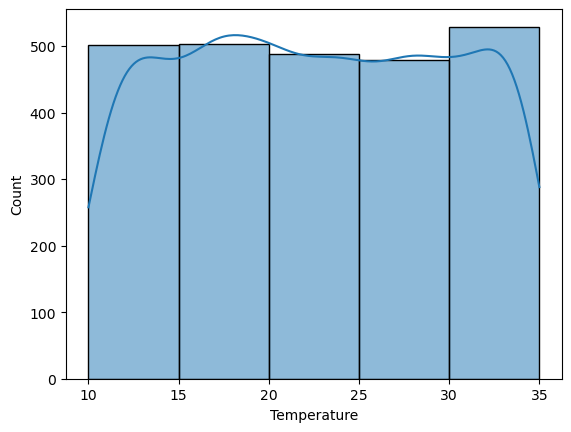

In [32]:
sb.histplot(data=df,bins=5,kde=True,x='Temperature',palette='pastel')

In [34]:
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'Rain'],
      dtype='object')

In [33]:
smote = SMOTE()

In [36]:
x1 , y1 = smote.fit_resample(df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']],df['Rain'])

In [38]:
df1 = pd.concat([x1,y1],axis=1)

In [40]:
df1.corr()

Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure  \
Temperature     1.000000 -0.210171   -0.003067    -0.164794  0.015444   
Humidity       -0.210171  1.000000    0.017156     0.242969 -0.023564   
Wind_Speed     -0.003067  0.017156    1.000000     0.002647  0.033631   
Cloud_Cover    -0.164794  0.242969    0.002647     1.000000  0.034585   
Pressure        0.015444 -0.023564    0.033631     0.034585  1.000000   
Rain           -0.450847  0.605377   -0.013007     0.534045 -0.002807   

                 Rain  
Temperature -0.450847  
Humidity     0.605377  
Wind_Speed  -0.013007  
Cloud_Cover  0.534045  
Pressure    -0.002807  
Rain         1.000000

In [41]:
df1['Rain'].value_counts()

Rain
1    2186
0    2186
Name: count, dtype: int64

In [42]:
df1.duplicated().sum()

0

In [45]:
x = df1.drop(['Rain'],axis=1).values

In [46]:
y = df1['Rain'].values

In [47]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3)

In [48]:
svc = SVC(kernel='rbf')

In [49]:
svc.fit(x_train,y_train)

SVC()

In [50]:
y_pred = svc.predict(x_test)

In [51]:
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [53]:
acc = accuracy_score(y_test,y_pred)
con_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

In [55]:
print(f"accuracy of the model = {acc*100}")
print("confusion matrix : ")
print(con_mat)
print("Classification report of Model " )
print(classification_rep)

accuracy of the model = 88.41463414634147
confusion matrix : 
[[535 132]
 [ 20 625]]
Classification report of Model 
              precision    recall  f1-score   support

           0       0.96      0.80      0.88       667
           1       0.83      0.97      0.89       645

    accuracy                           0.88      1312
   macro avg       0.89      0.89      0.88      1312
weighted avg       0.90      0.88      0.88      1312



In [56]:
c_val = [100.0,10.0,1.0,0.1,0.01,0.001,0.0001]

In [71]:
kernel = ['linear','poly','rbf','sigmoid']

In [72]:
degree = [1,2,3,4,5,6,7,8,9,10]

In [73]:
gamma = ['scale','auto']

In [74]:
probability = [True,False]

In [75]:
decision_function_shape = ['ovr','ovo']

In [76]:
break_ties = [True,False]

In [77]:
class_weight = ['balanced']

In [78]:
cv = StratifiedKFold()

In [79]:
param = dict(C=c_val,kernel=kernel,degree=degree,gamma=gamma,probability=probability,class_weight=class_weight,decision_function_shape = decision_function_shape,break_ties=break_ties)

In [80]:
param

{'C': [100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'gamma': ['scale', 'auto'],
 'probability': [True, False],
 'class_weight': ['balanced'],
 'decision_function_shape': ['ovr', 'ovo'],
 'break_ties': [True, False]}

In [81]:
grid = GridSearchCV(svc,param_grid=param,cv=cv,n_jobs=-1,scoring='accuracy')

In [82]:
x_train = scaler.fit_transform(x_train)

In [83]:
x_test = scaler.transform(x_test)

In [84]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001],
                         'break_ties': [True, False],
                         'class_weight': ['balanced'],
                         'decision_function_shape': ['ovr', 'ovo'],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False]},
             scoring='accuracy')

In [89]:
grid.best_score_*100

99.05228758169935

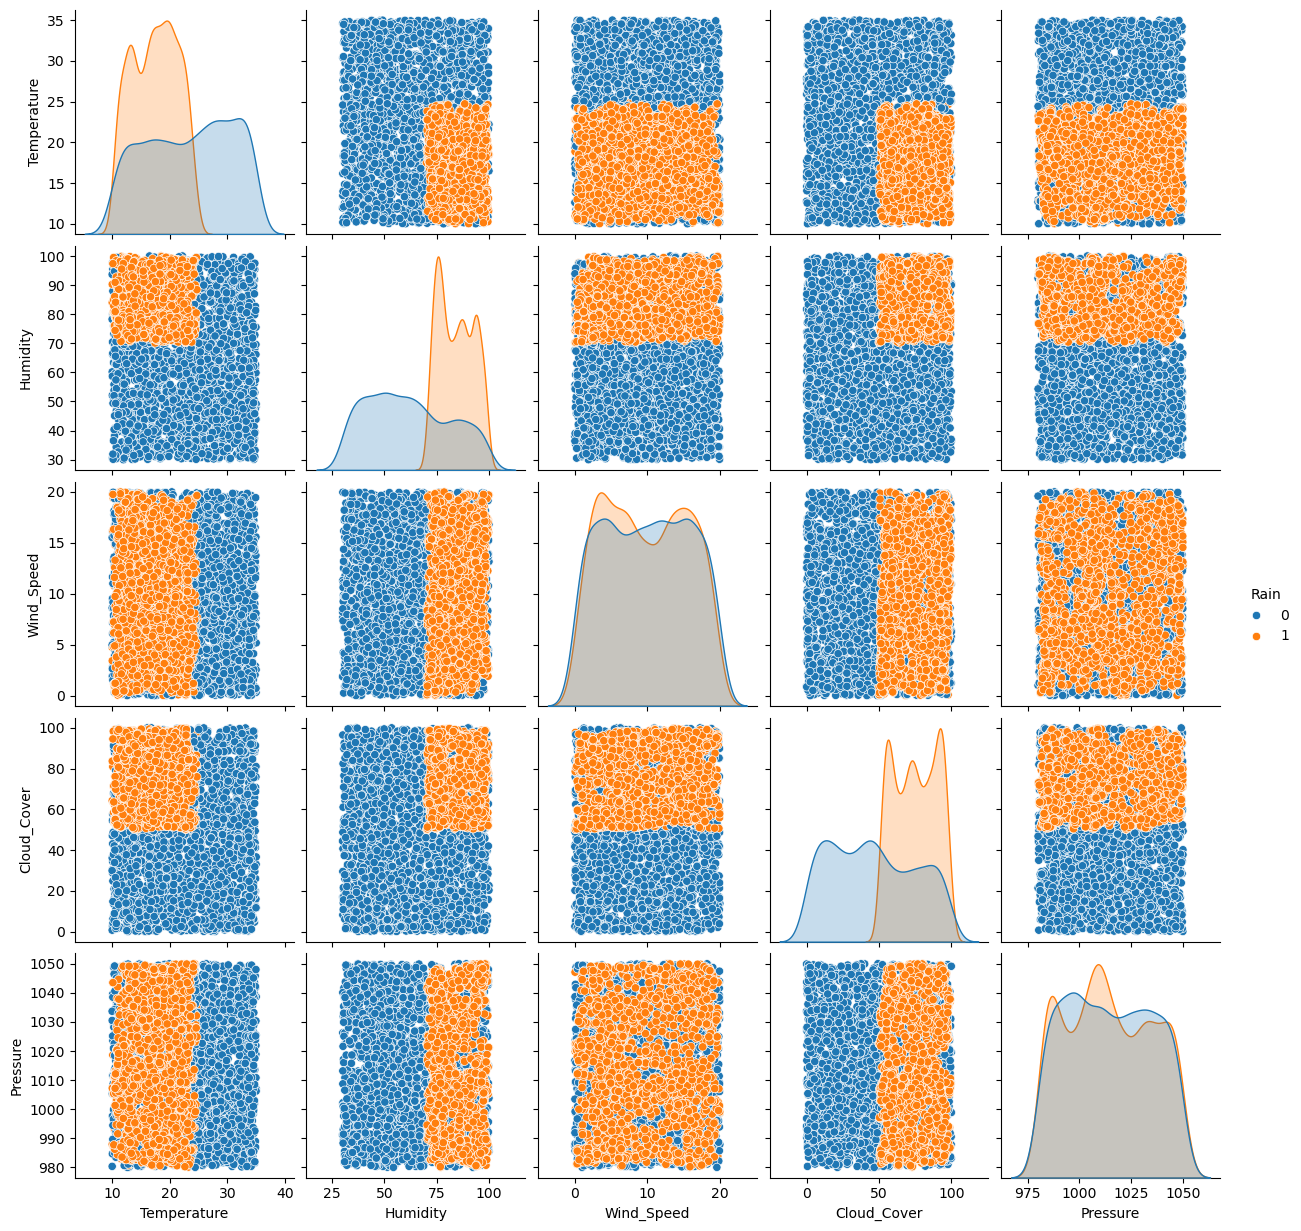

In [90]:
sb.pairplot(df1,hue='Rain')

In [93]:
pickle.dump(svc,open('model.pkl','wb'))

In [94]:
pickle.dump(scaler,open('scaler.pkl','wb'))